In [7]:
import numpy as np # This imports the NumPy library, which is widely used for numerical computing in Python. It provides support for multi-dimensional arrays and mathematical functions.
import pandas as pd # This imports the Pandas library, which is used for data manipulation and analysis. Pandas provides data structures like DataFrames and Series, along with functions to work with structured data efficiently.
import matplotlib.pyplot as plt # This imports the Pyplot module from the Matplotlib library, which is a plotting library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns # This imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.model_selection import train_test_split # This imports the train_test_split function from the model_selection module of the scikit-learn library. This function is commonly used to split datasets into training and testing sets for machine learning tasks.
from sklearn.metrics import accuracy_score # This imports the accuracy_score function from the metrics module of the scikit-learn library. This function is used to calculate the accuracy of classification models by comparing the predicted labels with the true labels.
from sklearn.tree import DecisionTreeClassifier # This imports the DecisionTreeClassifier class from the tree module of the scikit-learn library. Decision trees are a popular type of supervised learning algorithm used for classification tasks.
from sklearn.linear_model import LogisticRegression # This imports the LogisticRegression class from the linear_model module of the scikit-learn library. Logistic regression is a statistical method used for binary classification tasks.

In [8]:
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
# pd.read_csv: This function is provided by Pandas to read CSV files into a DataFrame. It takes the path to the CSV file as its argument.

# "Skyserver_SQL2_27_2018 6_51_39 PM.csv": This is the path to the CSV file you want to read. Ensure that the file is in the correct location relative to your Python script or specify the full path if it's located elsewhere.

# data: This is the variable name assigned to the DataFrame created by reading the CSV file. You can use this variable to access and manipulate the data in the DataFrame throughout your code.

In [9]:
data.head()
# data: This is the DataFrame containing your dataset, which was created when you read the CSV file using pd.read_csv().

# head(): This is a method of the DataFrame object. When called without any arguments, it returns the first 5 rows of the DataFrame.

# By calling data.head(), you're displaying the first 5 rows of your dataset to get a glimpse of what the data looks like.

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [10]:
data.drop(['objid','specobjid'], axis=1, inplace=True)
# data: This is the DataFrame you previously created.

# drop(['objid','specobjid'], axis=1, inplace=True): This is a method call on the DataFrame data to drop the specified columns.

# ['objid','specobjid']: This is a list of column names to drop from the DataFrame.

# axis=1: This specifies that the operation should be performed along columns (i.e., drop columns).

# inplace=True: This parameter specifies that the operation should be performed on the DataFrame itself, rather than returning a new DataFrame with the columns dropped. When inplace=True, the original DataFrame is modified in place, and the method returns None.

In [11]:
data.head()
# This will display the first 5 rows of the DataFrame data after dropping the specified columns.

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


<Axes: xlabel='class', ylabel='count'>

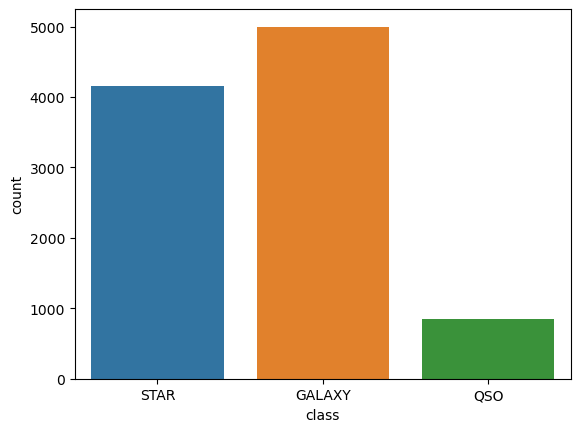

In [12]:
sns.countplot(x=data['class']) 

# sns.countplot: This is a function provided by the Seaborn library for creating count plots, which are used to show the counts of observations in each category of a categorical variable.

# x=data['class']: This specifies the data to be plotted on the x-axis of the count plot. In this case, it uses the 'class' column from the DataFrame data.

In [13]:
def change_category_to_number(classCat):
    if classCat=='STAR':
        return 0
    elif classCat=='GALAXY':
        return 1
    else:
        return 2
    
# This function, change_category_to_number, serves the purpose of converting categorical values into numerical representations. It takes one parameter, classCat, which is assumed to be a categorical value from the 'class' column.

# The first if statement checks if the classCat is equal to 'STAR'. If it is, the function immediately returns 0, indicating that 'STAR' has been mapped to the numerical value 0.

# The elif statement checks if the classCat is equal to 'GALAXY'. If it is, the function returns 1, implying that 'GALAXY' has been mapped to the numerical value 1.

# If none of the conditions above are met, meaning that the classCat value is neither 'STAR' nor 'GALAXY', the else block executes, returning 2. This represents a default or catch-all case, where any other category is mapped to the numerical value 2.

In [14]:
data['classCat'] = data['class'].apply(change_category_to_number)
# data['class']: This selects the 'class' column from the DataFrame data. In pandas, selecting a column is done by using square brackets [] with the column name inside.

# .apply(change_category_to_number): This part is using the .apply() method, which is a powerful feature in pandas that allows you to apply a function along an axis of a DataFrame. Here, change_category_to_number function is being applied to each element in the 'class' column.

# change_category_to_number: This function, as discussed earlier, takes a categorical value as input and returns its corresponding numerical value. By applying this function to each element in the 'class' column, we effectively convert all the categorical values in that column into numerical representations.

# data['classCat']: Finally, the result of the .apply() operation, which is a Series of numerical values obtained by applying change_category_to_number to each element in the 'class' column, is assigned to a new column named 'classCat' in the DataFrame data. This effectively adds a new column to the DataFrame containing the numerical representations of the categorical values from the original 'class' column.

In [15]:
data.head()
# This will show the first 5 rows of the DataFrame data with the new 'classCat' column containing the numerical values derived from the 'class' column.

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid,classCat
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491,0
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


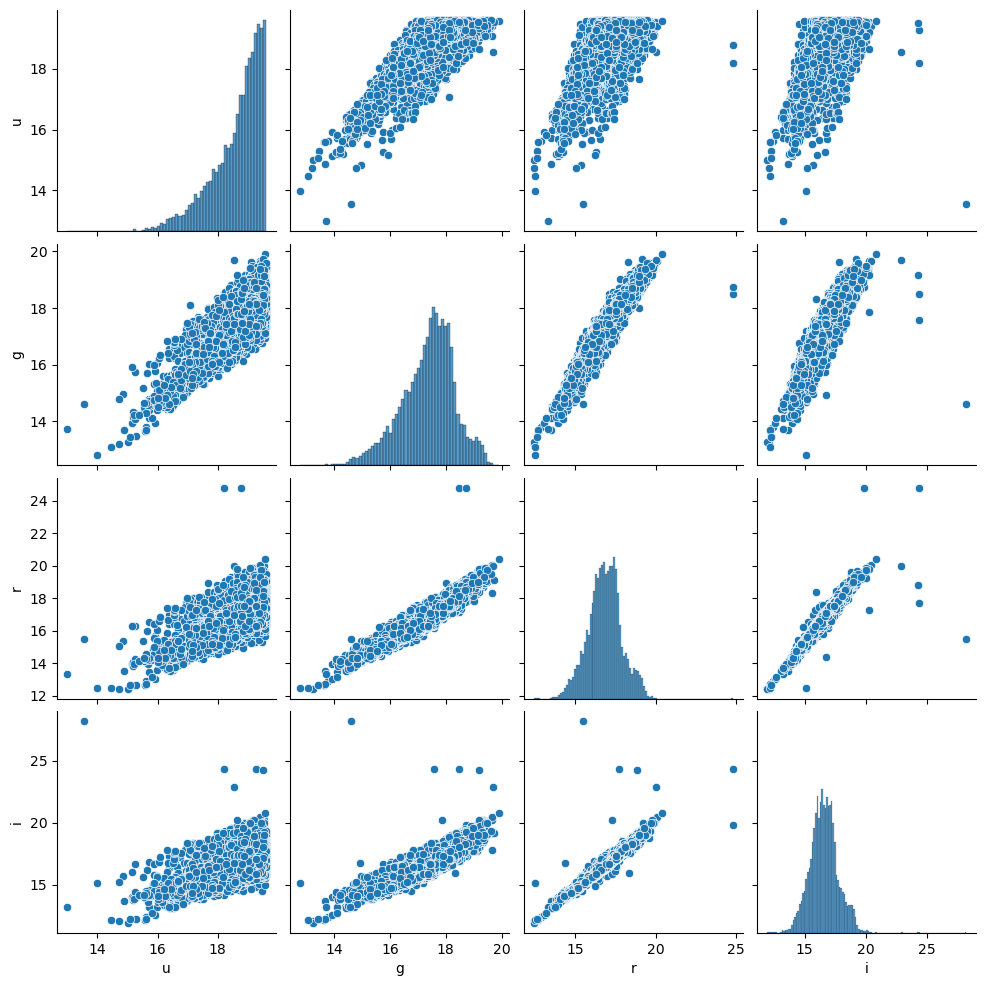

In [16]:
sns.pairplot(data[['u','g','r','i']])
# sns.pairplot: This function is provided by the Seaborn library and is used to create pair plots. Pair plots are a type of scatterplot matrix that allows visualization of the pairwise relationships between different variables in a dataset. Each pair of variables is plotted against each other, making it easy to identify patterns, correlations, and potential trends in the data.

# data[['u','g','r','i']]: This code selects a subset of columns from the DataFrame data, specifically the columns 'u', 'g', 'r', and 'i'. These columns likely represent different bands in astronomical observations, such as measurements of brightness in different wavelengths of light (e.g., ultraviolet, green, red, infrared). By selecting only these columns, the pair plot will focus on visualizing the relationships between these specific variables, which can provide insights into how they relate to each other in the dataset.

In [17]:
data.drop(['run','rerun','camcol','field','class'],axis=1,inplace=True) 
# data.drop([...], axis=1, inplace=True): This is a method call on the DataFrame data to drop the specified columns along the columns axis (axis=1). The drop() method in pandas is used to remove rows or columns from a DataFrame.

# ['run','rerun','camcol','field','class']: This is a list of column names to be dropped from the DataFrame data. These columns are likely considered unnecessary for further analysis or modeling, perhaps because they contain redundant or irrelevant information.

# inplace=True: This parameter specifies that the operation should be performed on the DataFrame itself, rather than returning a new DataFrame with the specified columns dropped. When inplace=True, the original DataFrame (data in this case) is modified in place, and the method returns None. This means that the changes made by the drop() method are directly applied to the original DataFrame, and there's no need to assign the result back to a variable. This can be useful for memory efficiency when working with large datasets.

In [18]:
data.head()
# This will show the first 5 rows of the DataFrame data after dropping the columns 'run', 'rerun', 'camcol', 'field', and 'class'. It allows you to quickly inspect the DataFrame to verify that the specified columns have been successfully dropped and to get an overview of the remaining data.

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,classCat
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491,0
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512,0


In [19]:
data.dtypes
# When you execute data.dtypes, it will indeed output a Series where the index contains the column names and the values contain the corresponding data types of each column in the DataFrame data. This is a handy way to quickly inspect the data types of all columns in your DataFrame.

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
redshift    float64
plate         int64
mjd           int64
fiberid       int64
classCat      int64
dtype: object

In [20]:
X = data.drop('classCat', axis=1)
y = data['classCat']
# X = data.drop('classCat', axis=1): This line assigns to X a DataFrame containing all columns of data except for the 'classCat' column. It drops the specified column along the columns axis (axis=1) and assigns the result to X. This is a common preprocessing step in machine learning tasks, where you separate the features (independent variables) from the target variable for modeling purposes.

# y = data['classCat']: This line assigns to y a Series containing only the values from the 'classCat' column of data. It selects the specified column and assigns its values to y, which represents the target variable. In machine learning, y typically represents the target variable that the model aims to predict based on the features X.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)
# train_test_split(X, y, test_size=0.3, random_state=128): This function splits the features (X) and the target variable (y) into random train and test subsets.
# X: The features (independent variables) DataFrame.
# y: The target variable (dependent variable) Series.
# test_size: The proportion of the dataset to include in the test split. Here, it's set to 0.3, meaning 30% of the data will be used for testing.
#random_state: This parameter ensures reproducibility by fixing the random seed. It controls the shuffling of the data before splitting. Setting it to a specific value (here, 128) ensures that the same random split is obtained every time the code is run.
# The function returns four subsets:

# X_train: The training set of features.
# X_test: The testing set of features.
# y_train: The training set of target variable values.
# y_test: The testing set of target variable values.

In [22]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)
# DecisionTreeClassifier: This is a class from scikit-learn (sklearn) used to create a decision tree classifier model. Decision trees are a popular supervised learning method for classification tasks.

# max_leaf_nodes=15: This parameter specifies the maximum number of leaf nodes in the decision tree. Limiting the number of leaf nodes helps prevent overfitting by controlling the complexity of the tree. Here, it's set to 15, which means the decision tree will have at most 15 leaf nodes.

# random_state=0: This parameter sets the random seed for reproducibility. It ensures that the random splitting of the data during the tree-building process is consistent across runs. Setting it to a specific value (here, 0) ensures reproducibility, meaning the same results will be obtained each time the code is run.

# By creating a DecisionTreeClassifier with these hyperparameters, you're building a decision tree model that's constrained to have a maximum of 15 leaf nodes and will produce consistent results across different runs due to the fixed random seed. This helps ensure reproducibility and control over the model's complexity.

In [23]:
dtClassifer.fit(X_train, y_train)
# dtClassifier.fit(X_train, y_train): This method fits (trains) the decision tree classifier (dtClassifier) to the training data. It takes two parameters:
# X_train: The training set of features.
# y_train: The corresponding training set of target variable values.
# When you call this method, the decision tree classifier is trained using the provided training data. It learns patterns in the features (X_train) to predict the target variable (y_train). The model adjusts its internal parameters to minimize the difference between the actual target values and the values predicted by the model.

#After fitting, the model is ready to make predictions on new data, as it has learned from the training data. This is a crucial step in the machine learning workflow, where the model learns from the data to make accurate predictions or classifications on unseen data.

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [24]:
prediction = dtClassifer.predict(X_test)
# dtClassifier.predict(X_test): This method predicts the target variable values (usually denoted as y_pred) for the test set of features (X_test) using the trained decision tree classifier (dtClassifier).
# The resulting prediction array (y_pred) contains the predicted class labels for the test set observations based on the learned patterns in the training data. These predictions can be compared with the actual target variable values (y_test) to evaluate the performance of the model.

# This step is crucial in the machine learning workflow as it allows you to assess how well the model generalizes to unseen data. By comparing the predicted values with the true values, you can calculate various performance metrics (such as accuracy, precision, recall, etc.) to evaluate the effectiveness of the model in making predictions.

In [25]:
prediction[:10]
# Executing prediction[:10] will indeed select the elements from index 0 to index 9 (inclusive) from the prediction array, allowing you to see the predicted class labels for the first 10 observations in the test set.

# This is a useful way to quickly inspect a subset of the predictions and compare them with the actual target variable values to get an initial understanding of how well the model is performing.

array([0, 1, 0, 0, 1, 1, 0, 2, 1, 1], dtype=int64)

In [26]:
y_test[:10]
# Executing y_test[:10] will indeed slice the y_test Series to display the first 10 elements (actual target variable values). It selects the elements from index 0 to index 9 (inclusive), allowing you to see the actual target variable values for the first 10 observations in the test set.

# This enables you to directly compare the model's predictions (prediction[:10]) with the true values (y_test[:10]) to assess the model's performance. By visually inspecting the predicted values alongside the true values, you can determine how accurately the model is predicting the target variable and identify any discrepancies or areas for improvement.

7054    0
4692    1
907     0
4498    0
9957    1
3341    1
7152    0
1152    2
7105    1
2066    1
Name: classCat, dtype: int64

In [27]:
accuracy_score(y_true=y_test, y_pred=prediction)
# accuracy_score(y_true=y_test, y_pred=prediction): This function computes the accuracy of the classification predictions. It takes two parameters:
# y_true: The true target variable values (actual labels).
# y_pred: The predicted target variable values (predicted labels).
# The accuracy_score function compares the predicted labels (prediction) with the actual labels (y_test) and returns the accuracy of the predictions as a floating-point number between 0 and 1.

0.9886666666666667

In [28]:
lrClassifier = LogisticRegression()
# LogisticRegression(): This is a class from scikit-learn used to create a logistic regression model for classification tasks. Logistic regression is a statistical method for binary classification, where the target variable has two possible outcomes.
# By calling LogisticRegression() without any parameters, you're creating a logistic regression classifier with default hyperparameters. This classifier can then be trained on data to make predictions on new observations.

In [29]:
lrClassifier.fit(X_train,y_train)
# lrClassifier.fit(X_train, y_train): This method fits (trains) the logistic regression classifier (lrClassifier) to the training data. It takes two parameters:
# X_train: The training set of features.
# y_train: The corresponding training set of target variable values.
# When you call this method, the logistic regression classifier learns the relationship between the features (X_train) and the target variable (y_train). It adjusts the model parameters to minimize the loss function (typically log loss or cross-entropy loss) and maximize the likelihood of predicting the correct class labels.

# After fitting, the model is ready to make predictions on new data. It has learned from the training data and is capable of making predictions based on the patterns it has identified during training. This step is crucial in supervised learning, where the model learns from labeled training data to make predictions on unseen or future data.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
prediction = lrClassifier.predict(X_test) 
# lrClassifier.predict(X_test): This method predicts the target variable values (usually denoted as prediction) for the test set of features (X_test) using the trained logistic regression classifier (lrClassifier).
# The resulting prediction array contains the predicted class labels for the test set observations based on the learned patterns in the training data. These predictions can be compared with the actual target variable values to evaluate the performance of the model.

# This step is crucial in the machine learning workflow as it allows you to assess how well the model generalizes to unseen data. By comparing the predicted values with the true values, you can calculate various performance metrics (such as accuracy, precision, recall, etc.) to evaluate the effectiveness of the model in making predictions.

In [31]:
prediction[:10]
# Executing prediction[:10] will indeed select the elements from index 0 to index 9 (inclusive) from the prediction array, allowing you to see the predicted class labels for the first 10 observations in the test set.

# This is a useful way to quickly inspect a subset of the predictions and compare them with the actual target variable values to get an initial understanding of how well the model is performing.

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [32]:
y_test[:10]
# Executing y_test[:10] will indeed slice the y_test Series to display the first 10 elements (actual target variable values). It selects the elements from index 0 to index 9 (inclusive), allowing you to see the actual target variable values for the first 10 observations in the test set.

# This enables you to directly compare the model's predictions (prediction[:10]) with the true values (y_test[:10]) to assess the model's performance. By visually inspecting the predicted values alongside the true values, you can determine how accurately the model is predicting the target variable and identify any discrepancies or areas for improvement.

7054    0
4692    1
907     0
4498    0
9957    1
3341    1
7152    0
1152    2
7105    1
2066    1
Name: classCat, dtype: int64

In [33]:
accuracy_score(y_true=y_test, y_pred=prediction)
# accuracy_score(y_true=y_test, y_pred=prediction): This function calculates the accuracy of the predictions made by comparing them with the true target variable values (y_test). It takes two parameters:
# y_true: The true target variable values (actual labels).
# y_pred: The predicted target variable values (predicted labels).
# The accuracy_score function compares the predicted labels (prediction) with the actual labels (y_test) and returns the accuracy of the predictions as a floating-point number between 0 and 1.

0.794